<a href="https://colab.research.google.com/github/Fikaaw/quantitative-finance/blob/main/option_pricing_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implement and compare different option pricing models such as the Black-Scholes model, Binomial Tree model, and Monte Carlo simulations.

Call Option Prices:
Black-Scholes: 10.4506
Binomial Tree: 10.4306
Monte Carlo: 10.4898

Put Option Prices:
Black-Scholes: 5.5735
Binomial Tree: 5.5536
Monte Carlo: 5.5731


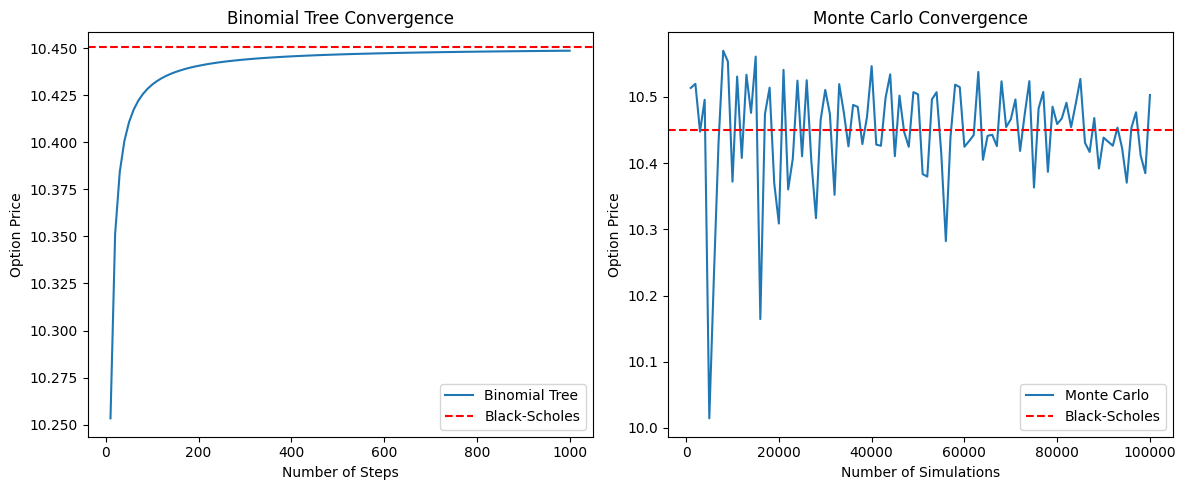

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

class OptionPricer:
    def __init__(self, S, K, T, r, sigma, option_type='call'):
        self.S = S  # Current stock price
        self.K = K  # Strike price
        self.T = T  # Time to maturity (in years)
        self.r = r  # Risk-free interest rate
        self.sigma = sigma  # Volatility
        self.option_type = option_type.lower()

    def black_scholes(self):
        d1 = (np.log(self.S / self.K) + (self.r + 0.5 * self.sigma ** 2) * self.T) / (self.sigma * np.sqrt(self.T))
        d2 = d1 - self.sigma * np.sqrt(self.T)

        if self.option_type == 'call':
            price = self.S * norm.cdf(d1) - self.K * np.exp(-self.r * self.T) * norm.cdf(d2)
        elif self.option_type == 'put':
            price = self.K * np.exp(-self.r * self.T) * norm.cdf(-d2) - self.S * norm.cdf(-d1)
        else:
            raise ValueError("Option type must be 'call' or 'put'")

        return price

    def binomial_tree(self, steps=100):
        dt = self.T / steps
        u = np.exp(self.sigma * np.sqrt(dt))
        d = 1 / u
        p = (np.exp(self.r * dt) - d) / (u - d)

        # Initialize asset prices at maturity
        prices = np.zeros(steps + 1)
        for i in range(steps + 1):
            prices[i] = self.S * (u ** (steps - i)) * (d ** i)

        # Initialize option values at maturity
        if self.option_type == 'call':
            values = np.maximum(prices - self.K, 0)
        elif self.option_type == 'put':
            values = np.maximum(self.K - prices, 0)
        else:
            raise ValueError("Option type must be 'call' or 'put'")

        # Iterate backwards through the tree
        for j in range(steps - 1, -1, -1):
            for i in range(j + 1):
                values[i] = np.exp(-self.r * dt) * (p * values[i] + (1 - p) * values[i + 1])

        return values[0]

    def monte_carlo(self, num_simulations=100000):
        dt = self.T
        Z = np.random.standard_normal(num_simulations)
        ST = self.S * np.exp((self.r - 0.5 * self.sigma ** 2) * dt + self.sigma * np.sqrt(dt) * Z)

        if self.option_type == 'call':
            payoffs = np.maximum(ST - self.K, 0)
        elif self.option_type == 'put':
            payoffs = np.maximum(self.K - ST, 0)
        else:
            raise ValueError("Option type must be 'call' or 'put'")

        price = np.exp(-self.r * self.T) * np.mean(payoffs)
        return price

def compare_models(S, K, T, r, sigma, option_type):
    pricer = OptionPricer(S, K, T, r, sigma, option_type)

    bs_price = pricer.black_scholes()
    binomial_price = pricer.binomial_tree()
    mc_price = pricer.monte_carlo()

    print(f"{option_type.capitalize()} Option Prices:")
    print(f"Black-Scholes: {bs_price:.4f}")
    print(f"Binomial Tree: {binomial_price:.4f}")
    print(f"Monte Carlo: {mc_price:.4f}")

def plot_convergence(S, K, T, r, sigma, option_type):
    pricer = OptionPricer(S, K, T, r, sigma, option_type)
    bs_price = pricer.black_scholes()

    steps_range = range(10, 1001, 10)
    binomial_prices = [pricer.binomial_tree(steps) for steps in steps_range]

    sim_range = range(1000, 100001, 1000)
    mc_prices = [pricer.monte_carlo(num_simulations) for num_simulations in sim_range]

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(steps_range, binomial_prices, label='Binomial Tree')
    plt.axhline(y=bs_price, color='r', linestyle='--', label='Black-Scholes')
    plt.xlabel('Number of Steps')
    plt.ylabel('Option Price')
    plt.title('Binomial Tree Convergence')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(sim_range, mc_prices, label='Monte Carlo')
    plt.axhline(y=bs_price, color='r', linestyle='--', label='Black-Scholes')
    plt.xlabel('Number of Simulations')
    plt.ylabel('Option Price')
    plt.title('Monte Carlo Convergence')
    plt.legend()

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Set option parameters
    S = 100  # Current stock price
    K = 100  # Strike price
    T = 1    # Time to maturity (in years)
    r = 0.05 # Risk-free interest rate
    sigma = 0.2  # Volatility

    # Compare models for call and put options
    compare_models(S, K, T, r, sigma, 'call')
    print()
    compare_models(S, K, T, r, sigma, 'put')

    # Plot convergence
    plot_convergence(S, K, T, r, sigma, 'call')

This script does the following:

Defines an OptionPricer class with methods for each pricing model:

*   black_scholes(): Implements the Black-Scholes formula
*   binomial_tree(): Implements the Binomial Tree model
*   monte_carlo(): Implements Monte Carlo simulation


Includes functions to compare the models and plot convergence:

*   compare_models(): Prices options using all three methods and prints the results
*   plot_convergence(): Shows how the Binomial Tree and Monte Carlo methods converge to the Black-Scholes price as the number of steps/simulations increases


In the main execution:

*   Sets option parameters
*   Compares models for both call and put options
*   Plots the convergence of Binomial Tree and Monte Carlo methods to the Black-Scholes price

This implementation provides a comprehensive comparison of the three option pricing models. It allows you to easily change the option parameters and see how they affect the pricing across different models.
Key points to note:

*   The Black-Scholes model provides a closed-form solution and is the fastest to compute.
*   The Binomial Tree model converges to the Black-Scholes price as the number of steps increases.
*   The Monte Carlo method converges to the Black-Scholes price as the number of simulations increases, but it can be computationally intensive for a large number of simulations.

Remember that this implementation is for European options. American options, which can be exercised before expiration, would require modifications to the Binomial Tree and Monte Carlo methods.